In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from PNN import TrainablePNN
import torch
from PNN import PNN
from GRNN import GRNN
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.stats import multivariate_normal

In [8]:
torch.manual_seed(19)

In [9]:
X, y = make_classification(
    n_samples=30,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=2,
    class_sep=0.5,
    random_state=300
)

X = np.round(X * 10, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

df = pd.DataFrame(X_train, columns=['Feature 1', 'Feature 2'])
df['Class'] = y_train

In [10]:
print(df.astype(int).to_latex())

\begin{tabular}{lrrr}
\toprule
 & Feature 1 & Feature 2 & Class \\
\midrule
0 & -1 & 5 & 1 \\
1 & -5 & -5 & 1 \\
2 & -17 & -14 & 0 \\
3 & -10 & -8 & 0 \\
4 & -4 & -2 & 0 \\
5 & 4 & -1 & 1 \\
6 & 0 & 1 & 0 \\
7 & -6 & -5 & 0 \\
8 & -9 & -4 & 0 \\
9 & 17 & 3 & 1 \\
10 & -5 & -1 & 0 \\
11 & -19 & -19 & 0 \\
12 & -1 & -2 & 1 \\
13 & -3 & -8 & 1 \\
14 & 12 & -11 & 1 \\
\bottomrule
\end{tabular}



In [11]:
input_vec = np.array([-11, -7])

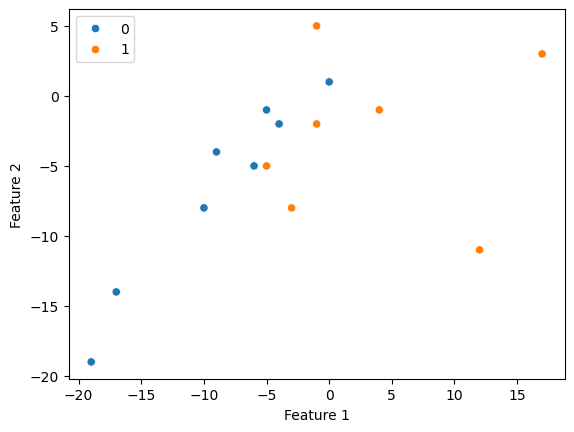

In [12]:
sns.scatterplot(df, x='Feature 1', y='Feature 2', hue='Class')
plt.legend()
plt.savefig('./visualization/input-demo')
plt.show()

In [14]:
sigma = 4
tau = 2

t_pnn_l1 = TrainablePNN(sigma=sigma, tau=tau, n_classes=2, losses=[1, 1], regularization='l1')
t_pnn_l2 = TrainablePNN(sigma=sigma, tau=tau, n_classes=2, losses=[1, 1], regularization='l2')
pnn = PNN(sigma=sigma, n_classes=2, losses=[1, 1], kernel='gaussian')

In [15]:
t_pnn_l1.fit(X_train, y_train)
t_pnn_l2.fit(X_train, y_train)
pnn.fit(X_train, y_train)

In [16]:
default_beta = np.ones(15) / 15

In [17]:
initial_beta = t_pnn_l1.pattern_layer.initial_beta
initial_beta_logits = t_pnn_l1.pattern_layer.initial_beta_logits

beta_estimate_l1 = t_pnn_l1.pattern_layer.beta.detach().cpu().numpy().flatten()
beta_estimate_l2 = t_pnn_l2.pattern_layer.beta.detach().cpu().numpy().flatten()

beta_logits_estimate_l1 = t_pnn_l1.pattern_layer.beta_logits.detach().cpu().numpy().flatten()
beta_logits_estimate_l2 = t_pnn_l2.pattern_layer.beta_logits.detach().cpu().numpy().flatten()

In [18]:
est_df = pd.DataFrame({'Pattern': [x.tolist() for x in X_train],
              "Init. $\beta'$": initial_beta_logits, 
              'Init. $\beta$': initial_beta,
              "L1 est. $\beta'$": beta_logits_estimate_l1,
              'L1 est. $\beta$': beta_estimate_l1,
              "L2 est. $\beta'$": beta_logits_estimate_l2,
              'L2 est. $\beta$': beta_estimate_l2,
              'Class': y_train})

print(est_df.to_latex(float_format="{:.3f}".format))

\begin{tabular}{llrrrrrrr}
\toprule
 & Pattern & Init. eta'$ & Init. eta$ & L1 est. eta'$ & L1 est. eta$ & L2 est. eta'$ & L2 est. eta$ & Class \\
\midrule
0 & [-1.0, 5.0] & -0.002 & 0.040 & -0.000 & 0.060 & -0.261 & 0.052 & 1 \\
1 & [-5.0, -5.0] & -0.284 & 0.030 & 0.000 & 0.060 & -1.518 & 0.015 & 1 \\
2 & [-17.0, -14.0] & -0.279 & 0.030 & -0.000 & 0.060 & 0.026 & 0.069 & 0 \\
3 & [-10.0, -8.0] & -2.099 & 0.005 & -1.092 & 0.020 & -0.522 & 0.040 & 0 \\
4 & [-4.0, -2.0] & 0.927 & 0.101 & 0.022 & 0.061 & -0.479 & 0.042 & 0 \\
5 & [4.0, -1.0] & -2.703 & 0.003 & -1.694 & 0.011 & 0.767 & 0.144 & 1 \\
6 & [0.0, 1.0] & 0.551 & 0.070 & -0.144 & 0.052 & -1.409 & 0.016 & 0 \\
7 & [-6.0, -5.0] & 2.094 & 0.326 & 1.224 & 0.204 & 0.032 & 0.069 & 0 \\
8 & [-9.0, -4.0] & -1.059 & 0.014 & -0.012 & 0.059 & 0.062 & 0.071 & 0 \\
9 & [17.0, 3.0] & -1.568 & 0.008 & -0.569 & 0.034 & 1.026 & 0.187 & 1 \\
10 & [-5.0, -1.0] & 0.250 & 0.052 & -0.000 & 0.060 & -0.329 & 0.048 & 0 \\
11 & [-19.0, -19.0] & 0.993 & 0.

In [19]:
est_df

,Pattern,Init. $eta'$,Init. $eta$,L1 est. $eta'$,L1 est. $eta$,L2 est. $eta'$,L2 est. $eta$,Class
0,"[-1.0, 5.0]",-0.002096,0.040073,-0.000204,0.059960,-0.260670,0.051690,1
1,"[-5.0, -5.0]",-0.283618,0.030240,0.000180,0.059983,-1.518135,0.014699,1
2,"[-17.0, -14.0]",-0.279060,0.030378,-0.000199,0.059960,0.025882,0.068843,0
3,"[-10.0, -8.0]",-2.098842,0.004923,-1.092295,0.020117,-0.522483,0.039784,0
4,"[-4.0, -2.0]",0.926605,0.101433,0.021613,0.061282,-0.479233,0.041542,0
5,"[4.0, -1.0]",-2.702712,0.002691,-1.693794,0.011024,0.767326,0.144498,1
6,"[0.0, 1.0]",0.550864,0.069662,-0.143855,0.051937,-1.408929,0.016396,0
7,"[-6.0, -5.0]",2.094141,0.326012,1.224016,0.203954,0.031933,0.069260,0
8,"[-9.0, -4.0]",-1.059462,0.013920,-0.012387,0.059234,0.061638,0.071349,0
9,"[17.0, 3.0]",-1.568196,0.008370,-0.569432,0.033935,1.026278,0.187208,1


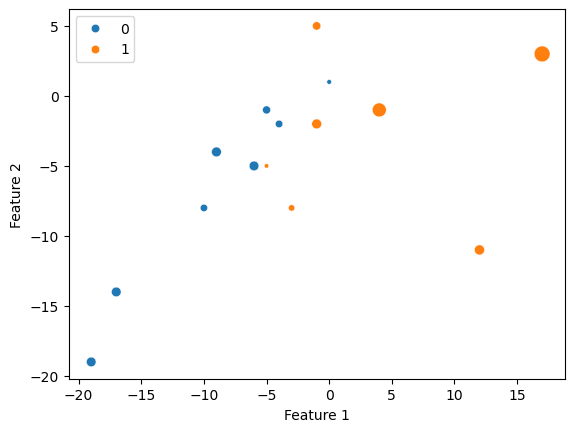

In [20]:
plot = sns.scatterplot(data=df,
                       x='Feature 1',
                       y='Feature 2',
                       hue='Class',
                       size=beta_estimate_l2,
                       sizes=(10, 130))

handles, labels = plot.get_legend_handles_labels()

new_handles = handles[0:2]
new_labels = labels[0:2]

plt.legend(new_handles, new_labels)
plt.savefig('./visualization/l2weighted')
plt.show()

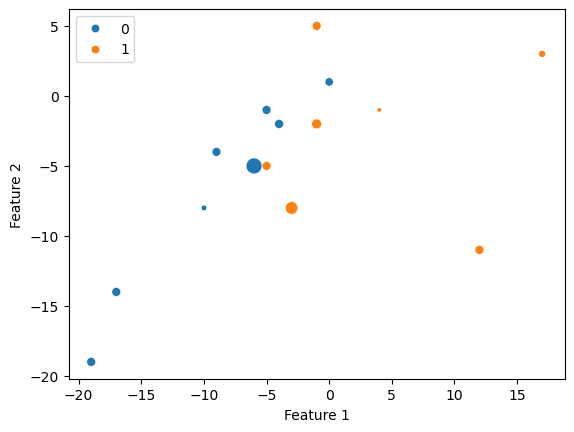

In [21]:
plot = sns.scatterplot(data=df,
                       x='Feature 1',
                       y='Feature 2',
                       hue='Class',
                       size=beta_estimate_l1,
                       sizes=(10, 130))

handles, labels = plot.get_legend_handles_labels()

new_handles = handles[0:2]
new_labels = labels[0:2]

plt.legend(new_handles, new_labels)
plt.savefig('./visualization/l1weighted')
plt.show()

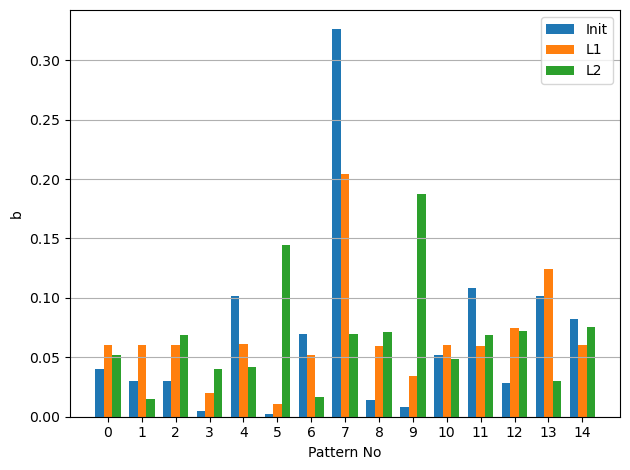

In [22]:
indices = np.arange(len(initial_beta))
width = 0.25

plt.bar(indices - width, initial_beta, width, label='Init')
plt.bar(indices, beta_estimate_l1, width, label='L1')
plt.bar(indices + width, beta_estimate_l2, width, label='L2')

plt.xlabel('Pattern No')
plt.ylabel('b')
plt.xticks(indices)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('./visualization/beta-compare')
plt.show()

In [23]:
x = np.linspace(X_train[:, 0].min() - 2, X_train[:, 0].max() + 2, 100)
y = np.linspace(X_train[:, 1].min() - 2, X_train[:, 1].max() + 2, 100)
X_grid, Y_grid = np.meshgrid(x, y)
grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]

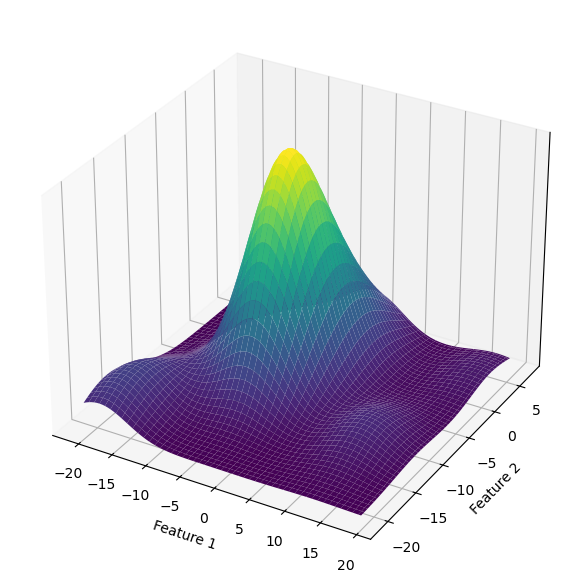

In [24]:
Z_l1 = np.zeros(len(grid_points))
for xi, beta in zip(X_train, beta_estimate_l1):
    rv = multivariate_normal(mean=xi, cov=sigma**2 * np.eye(2))
    Z_l1 += beta * rv.pdf(grid_points)

Z_l1 = Z_l1.reshape(X_grid.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_l1, cmap=cm.viridis, linewidth=0)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zticks([])
ax.set_zlabel("Density")

plt.savefig('./visualization/densityl1')
plt.tight_layout()
plt.show()

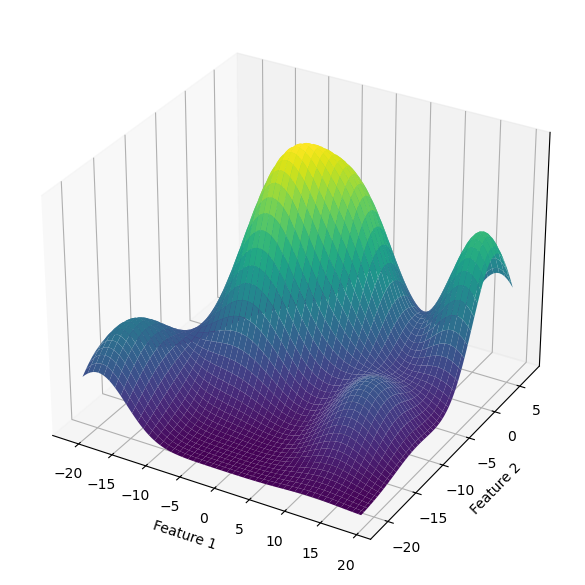

In [25]:
Z_l2 = np.zeros(len(grid_points))
for xi, beta in zip(X_train, beta_estimate_l2):
    rv = multivariate_normal(mean=xi, cov=sigma**2 * np.eye(2))
    Z_l2 += beta * rv.pdf(grid_points)

Z_l2 = Z_l2.reshape(X_grid.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_l2, cmap=cm.viridis, linewidth=0)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zticks([])
ax.set_zlabel("Density")

plt.savefig('./visualization/densityl2')
plt.tight_layout()
plt.show()

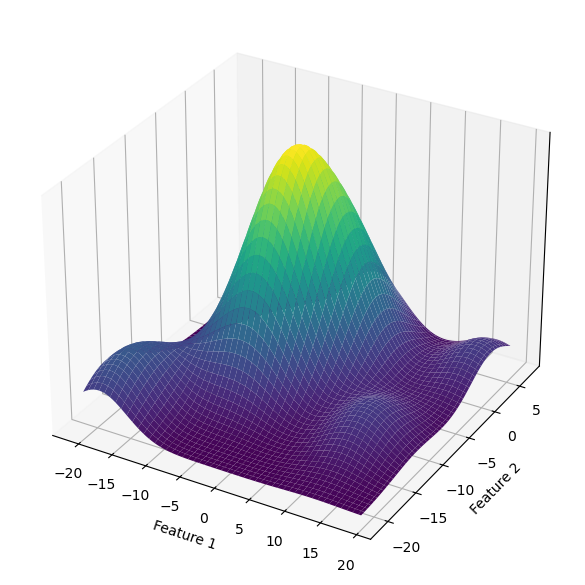

In [26]:
Z_def = np.zeros(len(grid_points))
for xi, beta in zip(X_train, default_beta):
    rv = multivariate_normal(mean=xi, cov=sigma**2 * np.eye(2))
    Z_def += beta * rv.pdf(grid_points)

Z_def = Z_def.reshape(X_grid.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_def, cmap=cm.viridis, linewidth=0)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zticks([])
ax.set_zlabel("Density")

plt.savefig('./visualization/densitybasic')
plt.tight_layout()
plt.show()

In [27]:
h = 0.2
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

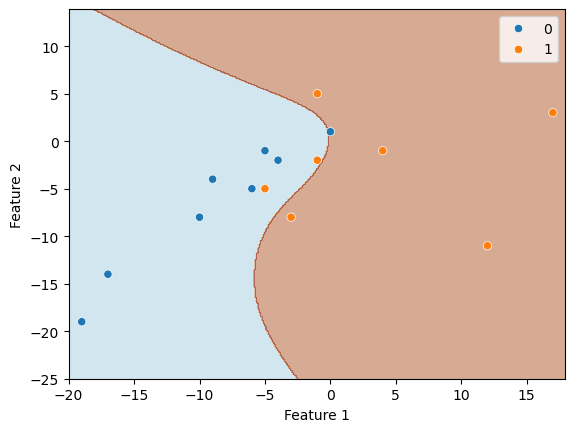

In [28]:
preds_pnn = np.array([pnn.predict(x) for x in grid])
zz = preds_pnn.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.5)
sns.scatterplot(df, x='Feature 1', y='Feature 2', hue='Class')
plt.legend()
plt.savefig('./visualization/decisionboundarybasic')
plt.show()

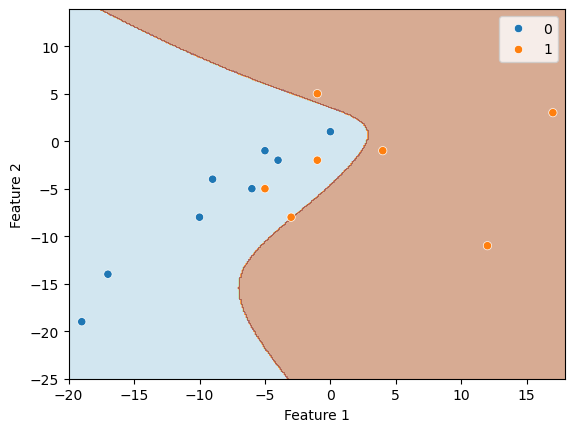

In [29]:
preds_l1 = np.array([t_pnn_l1.predict(x) for x in grid])
zz = preds_l1.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.5)
sns.scatterplot(df, x='Feature 1', y='Feature 2', hue='Class')
plt.legend()
plt.savefig('./visualization/decisionboundaryl1')
plt.show()

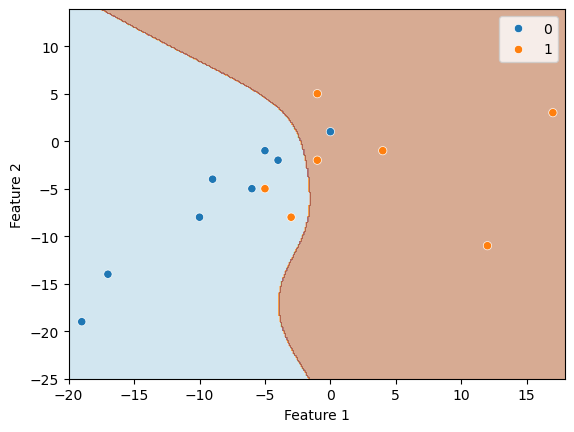

In [30]:
preds_l2 = np.array([t_pnn_l2.predict(x) for x in grid])
zz = preds_l2.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.5)
sns.scatterplot(df, x='Feature 1', y='Feature 2', hue='Class')
plt.legend()
plt.savefig('./visualization/decisionboundaryl2')
plt.show()